<a href="https://colab.research.google.com/github/Cyporg53/machine-learning/blob/main/Decision_Trees_Exercise_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORTANT PLEASE READ:
The first thing you should do is go to File > Save a Copy in Drive to make your own personal copy of this notebook. From there, you can start making edits to your notebook!

### Goal

Given a dataset of **Water4Everyone's** current employees, your job is to process this data and build a machine learning model that will predict whether a certain employee will attrite (leave) the company. This will allow **Water4Everyone's** HR department to identify employees predicted to attrite and negotiate terms that would motivate them to stay.

Good luck!

Click [here](https://docs.google.com/spreadsheets/d/1vhc0tf5_F_eD22MmcLmjwV9h971hmqWAMNBSv9JKvr4/edit?usp=sharing) to download the dataset. (Click on the link and go to "File" > "Download")

Now, upload the dataset that you just downloaded onto your computer

In [ ]:
from google.colab import files

dataset = files.upload()

Saving HR-Employee-Attrition.csv to HR-Employee-Attrition.csv


In [ ]:
pip install sklearn-json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import sklearn_json as skljson
import pandas as pd
import sklearn as skl

import matplotlib.pyplot as plt
import seaborn as sns

import string
import math
import numpy as np
import time

import numpy as np
import pandas as pd
import re
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [ ]:
df = pd.read_csv('HR-Employee-Attrition.csv', encoding='utf-8') 
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<Axes: ylabel='count'>

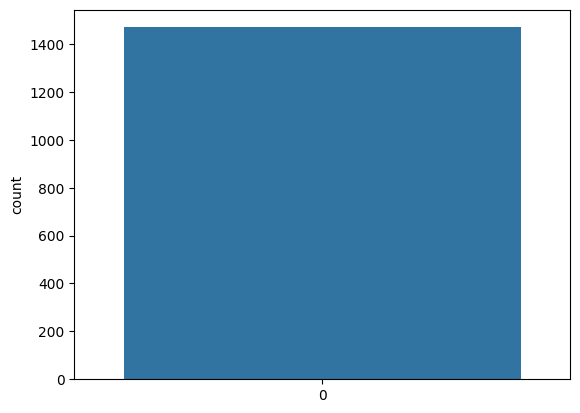

In [ ]:
sns.countplot(df['Age'])

In [ ]:
df.rename(columns = {'Attrition':'Label'}, inplace=True)
df.head()

,Age,Label,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
cols = list(df)
cols[1], cols[0] = cols[0], cols[1]
df_swp = df.reindex(columns=cols)
df_swp.head()

,Label,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Can we compare link between Age and Label
# Can we make a column linking daily and hourly rates for hrs/day

In [ ]:
df_swp.describe

<bound method NDFrame.describe of      Label  Age     BusinessTravel  DailyRate              Department  \
0      Yes   41      Travel_Rarely       1102                   Sales   
1       No   49  Travel_Frequently        279  Research & Development   
2      Yes   37      Travel_Rarely       1373  Research & Development   
3       No   33  Travel_Frequently       1392  Research & Development   
4       No   27      Travel_Rarely        591  Research & Development   
...    ...  ...                ...        ...                     ...   
1465    No   36  Travel_Frequently        884  Research & Development   
1466    No   39      Travel_Rarely        613  Research & Development   
1467    No   27      Travel_Rarely        155  Research & Development   
1468    No   49  Travel_Frequently       1023                   Sales   
1469    No   34      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1

<Axes: xlabel='Label', ylabel='count'>

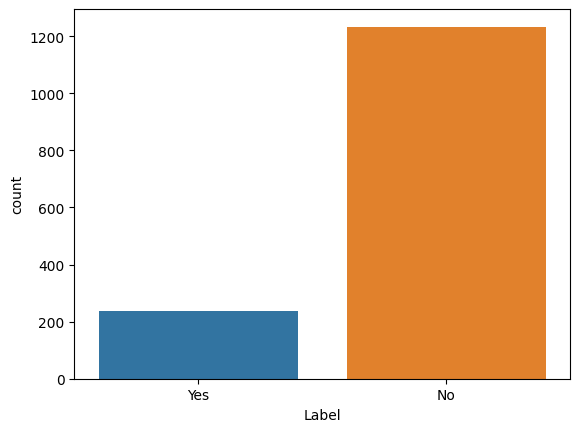

In [ ]:
sns.countplot(x='Label',data=df_swp)

<Axes: xlabel='Age', ylabel='count'>

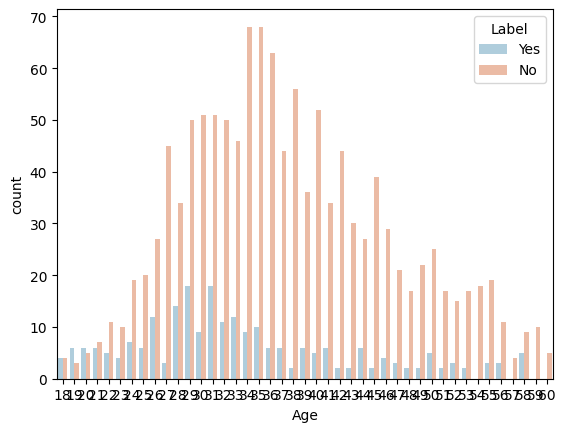

In [ ]:
sns.countplot(x='Age',hue='Label',data=df_swp,palette='RdBu_r')

In [ ]:
df_copy = df_swp.copy()

In [ ]:
# Maybe learn to do this without lambda
df_copy['Label']=df_copy[['Label']].apply(lambda x:x.map({'Yes':1,'No':0}))
df_copy.head()

,Label,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
print(df_copy.BusinessTravel.unique())
df_copy['BusinessTravel']=df_copy[['BusinessTravel']].apply(lambda x:x.map({
    'Non-Travel':0,'Travel_Rarely':1,'Travel_Frequently':2}))
df_copy.head()

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


,Label,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,2,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,1,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,2,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,1,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
print(df_copy.Department.unique())
df_copy['Department']=df_copy[['Department']].apply(lambda x:x.map({
    'Sales':0,'Research & Development':1,'Human Resources':2}))
df_copy.head()

['Sales' 'Research & Development' 'Human Resources']


,Label,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,0,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,2,279,1,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,1,1373,1,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,2,1392,1,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,1,591,1,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
print(df_copy.EducationField.unique())
df_copy['EducationField']=df_copy[['EducationField']].apply(lambda x:x.map({
    'Other':0, 'Life Sciences':1, 'Medical':2, 'Marketing':3,
       'Technical Degree':4, 'Human Resources':5}))
df_copy.head()

['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']


,Label,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,0,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,2,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,1,1373,1,2,2,0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,2,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,1,591,1,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
print(df_copy.Gender.unique())
df_copy['Gender']=df_copy[['Gender']].apply(lambda x:x.map({'Female':0,'Male':1}))
df_copy.head()

['Female' 'Male']


,Label,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,0,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,2,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,1,1373,1,2,2,0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,2,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,1,591,1,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
print(df_copy.OverTime.unique())
df_copy['OverTime']=df_copy[['OverTime']].apply(lambda x:x.map({'No':0, 'Yes':1}))
df_copy.head()

['Yes' 'No']


,Label,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,0,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,2,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,1,1373,1,2,2,0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,2,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,1,591,1,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
print(df_copy.MaritalStatus.unique())
df_copy['MaritalStatus']=df_copy[['MaritalStatus']].apply(lambda x:x.map({
    'Single':0,'Married':1,'Divorced':2}))
df_copy.head()

['Single' 'Married' 'Divorced']


,Label,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,0,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,2,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,1,1373,1,2,2,0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,2,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,1,591,1,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
print(df_copy.JobRole.unique())
df_copy['JobRole']=df_copy[['JobRole']].apply(lambda x:x.map({
    'Sales Executive':0, 'Research Scientist':1, 'Laboratory Technician':2,
 'Manufacturing Director':3, 'Healthcare Representative':4, 'Manager':5,
 'Sales Representative':6, 'Research Director':7, 'Human Resources':8
}))
df_copy.head()

['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']


,Label,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,0,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,2,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,1,1373,1,2,2,0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,2,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,1,591,1,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
print(df_copy.Over18.unique())
df_copy['Over18']=df_copy[['Over18']].apply(lambda x:x.map({'N':0, 'Y':1}))
df_copy.head()

['Y']


,Label,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,0,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,2,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,1,1373,1,2,2,0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,2,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,1,591,1,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


# THE ML STUFF

In [ ]:
y = df_copy[['Label']]
y

,Label
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [ ]:
df_copy.dtypes

Label                       int64
Age                         int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

## Scaling our dataset

In [ ]:
df_x = df_copy.iloc[:, 1:35]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(df_x)

## Splitting the dataset into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size=0.2)
x_train.shape

(1176, 34)

## Defining the ML model and passing our data through it

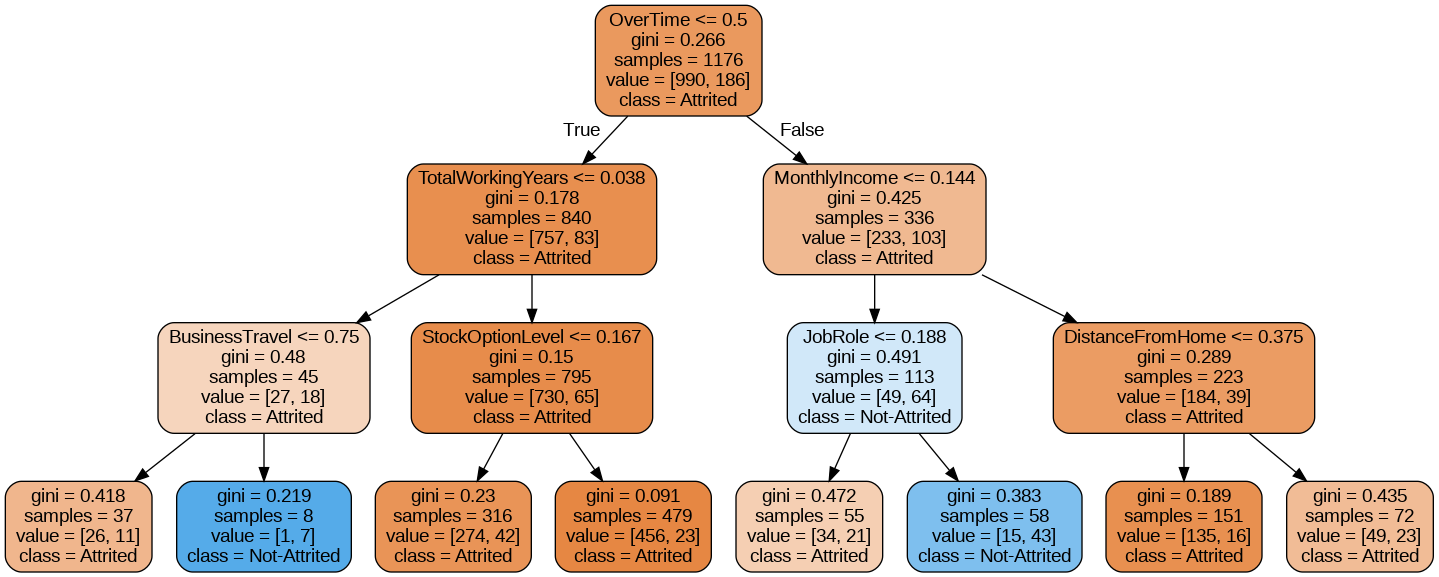

In [ ]:
# Create Numpy arrays of train, test and target dataframes to feed into our models

# Create Decision Tree with max_depth = 3
decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(x_train, y_train)

# Predicting results for test dataset
y_pred = decision_tree.predict(x_test)
submission = pd.DataFrame({
        "Attrited": y_pred
    })
submission.to_csv('submission.csv', index=False)

# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 3,
                              impurity = True,
                              feature_names = list(df_x.iloc[0:0, 0:35]),
                              class_names = ['Attrited', 'Not-Attrited'],
                              rounded = True,
                              filled= True )
     
     #Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])
# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
font = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', 26)
img.save('sample-out.png')
PImage("sample-out.png")

# Code to check available fonts and respective paths
# import matplotlib.font_manager
# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

## Measuring accuracy on test set

In [ ]:
acc_decision_tree = round(decision_tree.score(x_test, y_test) * 100, 2)
acc_decision_tree

80.61